In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
data_frame=pd.read_csv('final_input_data.csv')

In [4]:
data_frame

,home_team,away_team,batter_team,batter_name,pitcher_name,is_batter_lefty,is_pitcher_lefty,bb_type,bearing,pitch_name,park,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,launch_speed,launch_angle,is_home_run
0,0.135823,-0.310392,-1.084540,-1.024107,-0.475958,-0.799450,1.409524,0.0,0.330549,0.755566,-0.959282,-1.461673,0.063789,-1.106537,-0.098124,-1.271933,-0.496708,0.019756,0.763297,0.319626,1
1,-0.564859,-0.983792,-0.373853,-0.873397,-0.475958,1.250861,1.409524,0.0,1.615312,0.183273,-1.808714,-1.058752,-1.158423,-0.130886,-0.098124,-0.500763,1.188717,-0.789288,0.726278,0.319626,1
2,-0.564859,-0.983792,-0.373853,-0.692545,-0.475958,-0.799450,1.409524,0.0,0.330549,-0.961313,-1.808714,-1.461673,1.286002,-0.130886,-0.098124,-0.817140,1.133757,0.467313,0.489354,0.764865,1
3,-0.564859,-0.849112,-0.658128,-0.923634,-0.475958,-0.799450,1.409524,0.0,0.330549,-0.961313,-1.808714,0.150011,-1.158423,1.820416,-0.098124,-0.777593,0.730721,0.794373,0.696662,0.141530,1
4,-0.564859,-0.849112,-0.658128,-0.793018,-0.475958,1.250861,1.409524,0.0,-0.954214,-0.961313,-1.808714,-1.058752,-1.158423,-0.130886,-0.098124,-0.065743,-0.368469,0.759946,0.763297,0.275102,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,2.798414,2.113848,2.753168,2.773793,-0.379546,-0.799450,-0.709459,0.0,-0.954214,0.183273,-0.716587,0.150011,1.286002,1.820416,1.129436,0.784522,-0.185271,-0.582723,0.607816,0.853913,0
7890,2.658278,2.113848,2.042481,2.472372,-0.379546,1.250861,-0.709459,0.0,1.615312,0.183273,-1.323324,1.761694,-1.158423,-1.106537,-0.098124,-0.223932,-0.716546,-0.634364,0.607816,1.165581,0
7891,2.658278,2.113848,2.042481,0.563375,-0.379546,1.250861,-0.709459,0.0,-0.954214,0.183273,-1.323324,1.761694,1.286002,-0.130886,1.129436,0.744974,-0.624947,-0.513869,0.200602,-0.081090,0
7892,0.696368,2.383207,2.611031,3.246019,-0.379546,1.250861,-0.709459,0.0,1.615312,0.755566,-1.080629,-1.058752,1.286002,0.844765,-0.098124,-1.528990,1.225356,-0.754860,-1.539308,0.319626,0


In [5]:
x = data_frame.drop(['is_home_run'],axis=1)
y = data_frame[['is_home_run']]

### Model Selection

In [6]:
#Selecting various classification models

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [31]:
models = {'log_regression':LogisticRegression(),
         'random_forest':RandomForestClassifier(),
         'decision_tree':DecisionTreeClassifier()}
model_predictions = {}

In [32]:
#spliting the data where we will split 70% for the training and 30% for the test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [33]:
for model in models:
    each_model = models[model]
    each_model.fit(x_train,y_train)
    print('Score: ',each_model.score(x_test,y_test))
    model_predictions[model] = models[model].predict(x_test)

Score:  0.9535669058674546
Score:  0.9628535246939637
Score:  0.9472351203039258


## Model evaluation

In [11]:
#use ensemble techniques
#use hyperparameter tuning


In [12]:
#cross validation
#performance metrics
#using accuracy, precision, recall, f1-score, ROC-AUC score

In [13]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Initialize base classifiers
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression()),
    ('dt',DecisionTreeClassifier())
]

# Initialize stacking classifier
stacking_clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression()
)

# Train the model
stacking_clf.fit(x_train, y_train)

# Predict
y_pred_stacking = stacking_clf.predict(x_test)


In [15]:
stacking_clf.score(x_test,y_test)

0.9674968341072182

In [16]:
#cross-validation

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
for predicted_values in model_predictions:
    print(classification_report(y_test,model_predictions[predicted_values]))
    print(confusion_matrix(y_test,model_predictions[predicted_values]))
    

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1653
           1       0.97      0.87      0.92       716

    accuracy                           0.95      2369
   macro avg       0.96      0.93      0.94      2369
weighted avg       0.95      0.95      0.95      2369

[[1633   20]
 [  90  626]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1653
           1       0.99      0.89      0.94       716

    accuracy                           0.96      2369
   macro avg       0.97      0.94      0.95      2369
weighted avg       0.96      0.96      0.96      2369

[[1647    6]
 [  82  634]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1653
           1       0.90      0.92      0.91       716

    accuracy                           0.95      2369
   macro avg       0.94      0.94      0.94      2369
weighted avg       0

In [41]:
from sklearn.model_selection import GridSearchCV

# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search_rf = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', verbose=1, return_train_score=True)

# Perform Grid Search
grid_search_rf.fit(x_train, y_train)

# Best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

# Best model
best_rf_clf = grid_search_rf.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


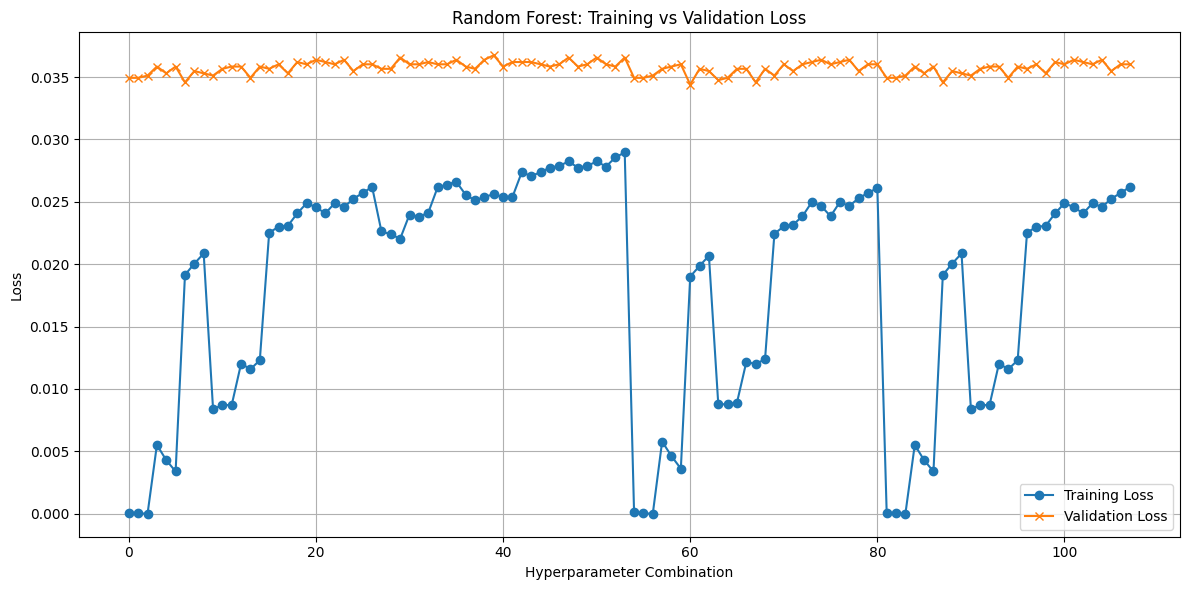

In [43]:
train_loss_rf = 1 - grid_search_rf.cv_results_['mean_train_score']
val_loss_rf = 1 - grid_search_rf.cv_results_['mean_test_score']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_loss_rf, label='Training Loss', marker='o')
plt.plot(val_loss_rf, label='Validation Loss', marker='x')
plt.title('Random Forest: Training vs Validation Loss')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Loss')
#plt.xticks(ticks=range(len(param_grid['n_estimators'])), labels=[str(params) for params in grid_search_rf.cv_results_['params']], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
from sklearn.model_selection import GridSearchCV

# Initialize Random Forest classifier
lr_clf = LogisticRegression()

# Define hyperparameter grid
# Define hyperparameter grid for Logistic Regression
param_grid_logreg = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}


# Initialize Grid Search
grid_search_rf = GridSearchCV(lr_clf, param_grid_logreg, cv=5, scoring='accuracy', verbose=1, return_train_score=True)

# Perform Grid Search
grid_search_rf.fit(x_train, y_train)

# Best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_rf)

# Best model
best_rf_clf = grid_search_rf.best_estimator_


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
Best Hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


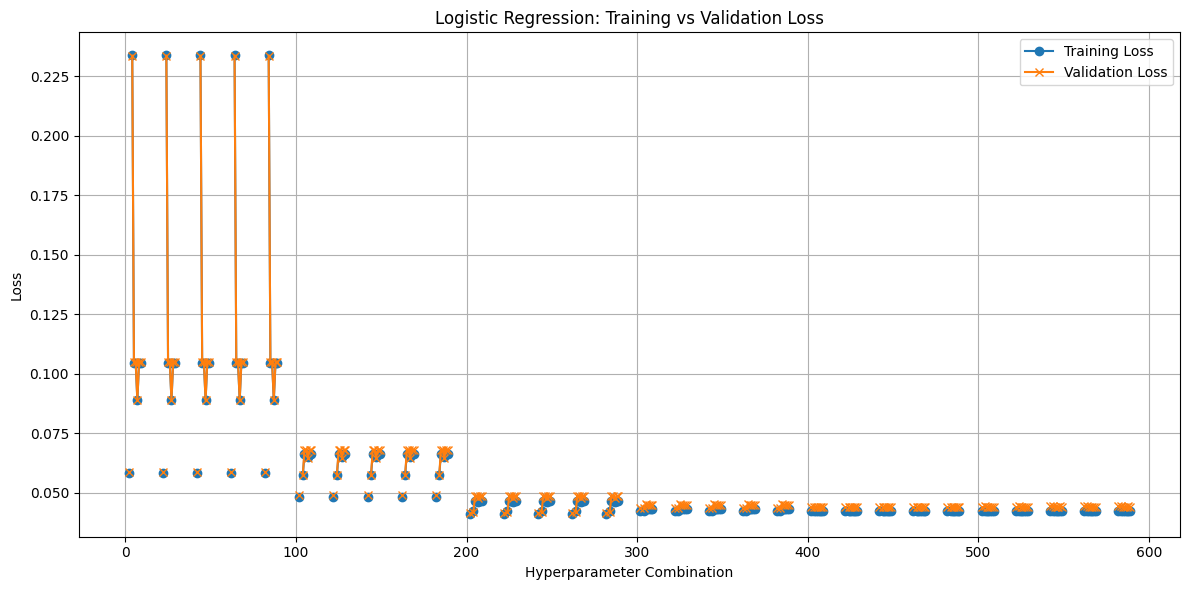

In [46]:
train_loss_rf = 1 - grid_search_rf.cv_results_['mean_train_score']
val_loss_rf = 1 - grid_search_rf.cv_results_['mean_test_score']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_loss_rf, label='Training Loss', marker='o')
plt.plot(val_loss_rf, label='Validation Loss', marker='x')
plt.title('Logistic Regression: Training vs Validation Loss')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Loss')
#plt.xticks(ticks=range(len(param_grid['n_estimators'])), labels=[str(params) for params in grid_search_rf.cv_results_['params']], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV

# Initialize Random Forest classifier
dt_clf = DecisionTreeClassifier()

# Define hyperparameter grid
# Define hyperparameter grid for Logistic Regression
# Define hyperparameter grid for Decision Tree Classifier
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}


# Initialize Grid Search
grid_search_rf = GridSearchCV(dt_clf, param_grid_dt, cv=5, scoring='accuracy', verbose=1, return_train_score=True)

# Perform Grid Search
grid_search_rf.fit(x_train, y_train)

# Best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Decision Tree Classifier:", best_params_rf)

# Best model
best_rf_clf = grid_search_rf.best_estimator_


Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best Hyperparameters for Decision Tree Classifier: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}


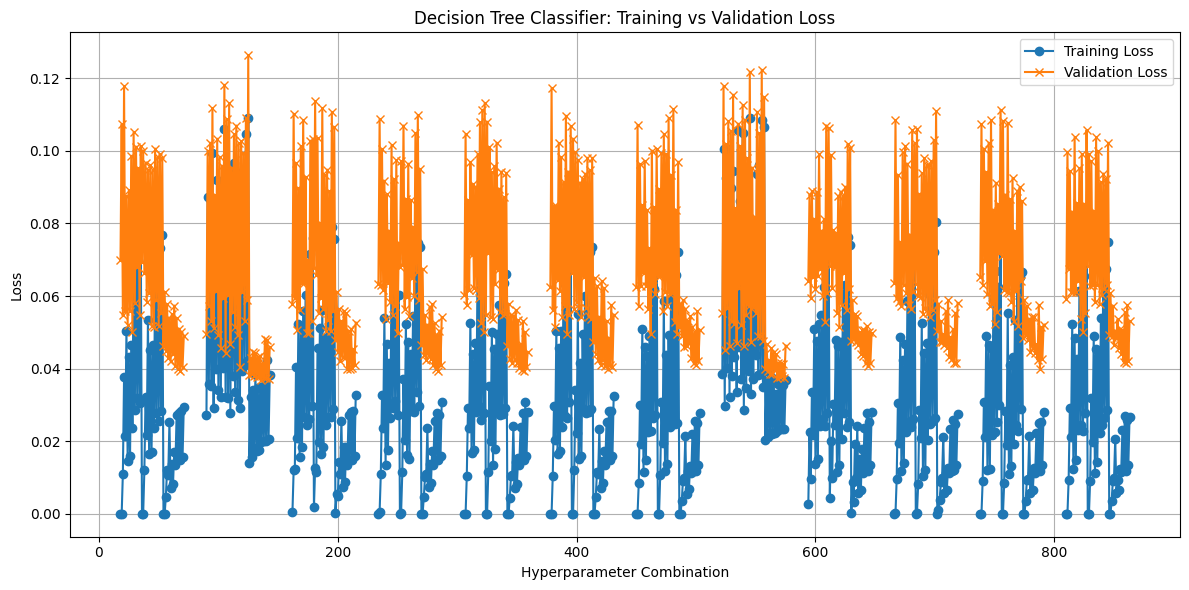

In [49]:
train_loss_rf = 1 - grid_search_rf.cv_results_['mean_train_score']
val_loss_rf = 1 - grid_search_rf.cv_results_['mean_test_score']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_loss_rf, label='Training Loss', marker='o')
plt.plot(val_loss_rf, label='Validation Loss', marker='x')
plt.title('Decision Tree Classifier: Training vs Validation Loss')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('Loss')
#plt.xticks(ticks=range(len(param_grid['n_estimators'])), labels=[str(params) for params in grid_search_rf.cv_results_['params']], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()